# HW1  Try out gradient descent

You should submit this jupyter notebook with your solutions. The solutions should include the code and also the output of all the cells.

Note that for the problmes that require a cost function as input you should always use the most recent cost function that you have implemented (unless specified otherwise).

### 1) [5 points] Calculate the derivative of following cost function and write it down:

$g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w - 50 \right)$

$\frac{\partial}{\partial w}g(w) = \frac{1}{50}\left(4w^3 + 2w + 10 \right)$

### 2) [25 points] Implement the gradient descent function as discussed in class using the gradient derived in the last problem. The function should return the cost history for each step. Use the code template below:


In [270]:
import autograd.numpy as np
from autograd import grad

In [271]:
# cost function function. Input weight w
def grad_cost(w):
    return (1/50)*(4*w**3 + 2*w +10)

In [272]:
def cost_function(w):
    return (1/50)*(w**4 + w**2 +10*w -50)

In [273]:
#gradient descent function
#inputs: alpha (learning rate parameter), max_its (maximum number of iterations), w0 (initialization)
def gradient_descent(alpha,max_its,w0):
    w = w0
    cost_history = []
    
    for i in range(max_its):
        cost_history.append(cost_function(w)) # run cost function on w0, store in array
        w = w - alpha * grad_cost(w) #perform step, move towards minimum
    ##Your code here
    return cost_history

### 3) [10 points] Run the gradient_descent function you implemented three times, with the following parameters. 
Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). If you are not familiar with plotting in python, here is the docs for matplotlib:(https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). 


$w^0$ = 2.0
max_its = 1000




#### first run
alpha = 1

In [274]:
array1 = gradient_descent(1, 1000, 2.0)

#### second run
alpha = 0.1

In [275]:
array2 = gradient_descent(0.1, 1000, 2.0)

#### third run
alpha = 0.01

In [276]:
array3 = gradient_descent(0.01, 1000, 2.0)

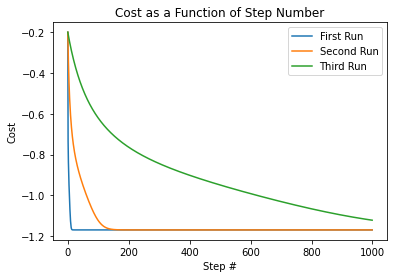

In [277]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(array1, label="First Run")
plt.plot(array2, label="Second Run")
plt.plot(array3, label="Third Run")

plt.xlabel("Step #")
plt.ylabel("Cost")
plt.title("Cost as a Function of Step Number")

plt.legend()
plt.show()
##Your code here

For the next few problems we will be comparing fixed and diminishing learning rates

Take the following cost function:
\begin{equation}
g(w) = \left \vert w \right \vert
\end{equation}

### 4) [5 points] Is this function convex? If no, why not? If yes, where is its global minimum?

Yes, this function is convex. It's global minimum is at 0. 

### 5) [5 points] What is the derivative of the cost function? 

$\frac{\partial}{\partial w}g(w) = \begin{cases}
  1  & w > 0 \\
  -1 & w < 0 \\
  \text{does not exist} & w = 0
\end{cases}$

### 6) [20 points] Rewrite the gradient descent function from question 2 such that it takes the cost funciton g as input and uses the autograd library to calculate the gradient. 
The function should return the weight and cost history for each step. Use the code template below.

autograd is a python package for automatic calculation of the gradient. Here is a tutorial on it: (http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/tutorials/tut4.pdf

Note that in Python you can pass functions around like any other variables. That is why you can pass the cost function g to the gradient_descent function. 

You should be able to install it by running "pip install autograd" in a cell in your Jupyter notebook.

In [278]:
# cost function function. Input weight w
def g(w):
    return abs(w)

In [279]:
from autograd import grad 

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    ##Your code here
    w = w0
    weight_history = []
    cost_history = []
    gradient = grad(g)
    
    for i in range(max_its):
        weight_history.append(w)
        cost_history.append(g(w))# run cost function on w0, store in array
        w = w - alpha * gradient(w) #perform step, move towards minimum
    
    
    return weight_history,cost_history

### 7) [10 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, and a fixed learning rate of $\alpha = 0.5$. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis). Recall that the terms weight and parameter used interchangeably and both refer to w.

In [280]:
weight_array, cost_array = gradient_descent(g, 0.5, 20, 1.75)

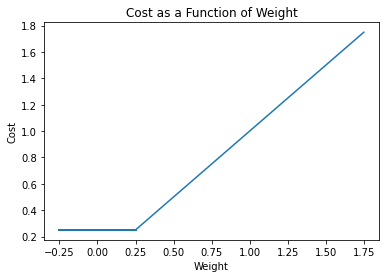

In [281]:
plt.plot(weight_array, cost_array)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.title("Cost as a Function of Weight")
plt.show()

### 8) [15 points] Make a run of max_its=20 steps of gradient descent with initialization at the point $w^0 = 1.75$, using the diminishing rule $\alpha = \frac{1}{k}$ (for this you have to modify the gradient_descent function slightly. Use the code template below. Using the cost and weight history, plot the cost as a function of the weight for each step (cost on y-axis, weight on x-axis)

In [282]:
from autograd import grad 

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    w = w0
    weight_history = []
    cost_history = []
    gradient = grad(g)
    ##Your code here
    if alpha=='diminishing':
        for i in range(max_its):
            weight_history.append(w)
            cost_history.append(g(w))# run cost function on w0, store in array
            w = w - (1/(i+1)) * gradient(w) #perform step with diminishing learning rate
    else:
        for i in range(max_its):
            weight_history.append(w)
            cost_history.append(g(w))# run cost function on w0, store in array
            w = w - alpha * gradient(w) #perform step, move towards minimum
        
    return weight_history,cost_history

In [283]:
weight_array2, cost_array2 = gradient_descent(g, 'diminishing', 20, 1.75)

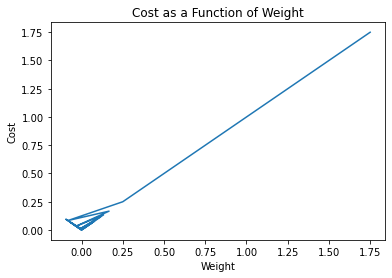

In [284]:
plt.plot(weight_array2, cost_array2)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.title("Cost as a Function of Weight")
plt.show()

### 9) [10 points]  Generate a single plot showing the cost as a function of step number for both runs (combine all  runs into a single plot). Which approach works better? Why ?

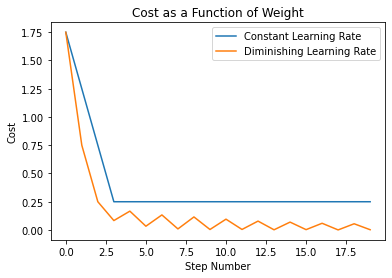

In [285]:
plt.plot(cost_array, label = 'Constant Learning Rate')
plt.plot(cost_array2, label = 'Diminishing Learning Rate')
plt.xlabel('Step Number')
plt.ylabel('Cost')
plt.title("Cost as a Function of Weight")
plt.legend()
plt.show()

***FILL IN***: Using a diminishing learning rate works better because it converges more quickly. 

We will now look at the oscilating behavior of gradient descent. 

Take the following cost function:
$g(w) = w_0^2 + w_1^2 + 2\sin(1.5 (w_0 + w_1)) +2$

Note that this cost function has two parameters.

### 10) [5 points] Make sure your gradient descent function from problem 6 can handle cost functions with more than one parameter. 
You may need to rewrite it if you were not careful. Use the code template below (if your function from problem 6 is good, you can just copy and paste it here)

In [286]:
# cost function function. Input weight w
def g(w):
    return (w[0]**2) + (w[1]**2)+ 2*np.sin(1.5*(w[0]+w[1]))+2

In [287]:
from autograd import grad 

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    ##Your code here
    w = w0
    weight_history = []
    cost_history = []
    gradient = grad(g)
    
    for i in range(max_its):
        weight_history.append(w)
        cost_history.append(g(w))# run cost function on w0, store in array
        w = w - alpha * gradient(w) #perform step, move towards minimum

    
    return weight_history,cost_history

### 11) [10 points] Run the gradient_descent function with the cost function above three times with the following parameters. 
Generate a single plot showing the cost as a function of step number for all three runs (combine all three runs into a single plot). Use the code template below. Which alpha leads to an oscillating behavior?

$w^0$ = [3.0,3.0]
max_its = 10

### first run
alpha = 0.01



In [288]:
w = np.array([3.0, 3.0])

In [289]:
cost1 = gradient_descent(g, 0.01, 10, w)[1]

### second run
alpha = 0.1


In [290]:
cost2 = gradient_descent(g, 0.1, 10, w)[1]

### third run
alpha = 1


In [291]:
cost3 = gradient_descent(g, 1, 10, w)[1]

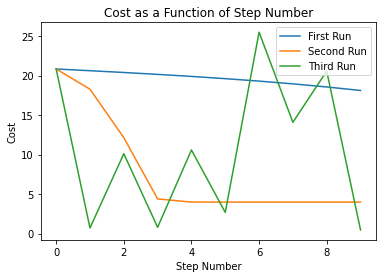

In [292]:
plt.plot(cost1, label = 'First Run')
plt.plot(cost2, label = 'Second Run')
plt.plot(cost3, label = 'Third Run')
plt.xlabel('Step Number')
plt.ylabel('Cost')
plt.title("Cost as a Function of Step Number")
plt.legend()
plt.show()

The alpha 1 leads to an oscillating behavior.

### 12) [15 points] This problem is about learning to tune fixed step length for gradient descent. Here, you are given a cost function:
$g(w) = 2w_0^2 + w_1^2 +4w_2^2$ 

Assume your $w^0$= [5,5,5] and your max_iter = 100

Use your latest gradient descent function with a fixed learning rate. Play around with at least 5 different values of alpha (using your intuition). Generate a single plot of the cost as a function of the number of iterations. Which value of alpha seems to converge the fastest?

Not that your grade will not depend on how well you do, as long as you try at least 5 different values for alpha and plot them.

In [293]:
# cost function function. Input weight w
def g(w):
    return (2*w[0]**2) + (w[1]**2)+ (4*w[2]**2)

In [294]:
w = np.array([5.0, 5.0, 5.0])

In [295]:
# alpha = 0.01
cost1 = gradient_descent(g, 0.001, 100, w)[1]

# alpha = 0.01
cost2 = gradient_descent(g, 0.01, 100, w)[1]

# alpha = 0.025
cost3 = gradient_descent(g, 0.025, 100, w)[1]

# alpha = 0.05
cost4 = gradient_descent(g, 0.05, 100, w)[1]

# alpha = 0.1
cost5 = gradient_descent(g, 0.1, 100, w)[1]

# alpha = 0.15
cost6 = gradient_descent(g, 0.15, 100, w)[1]

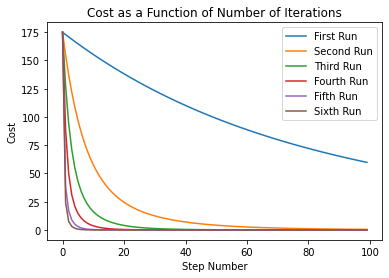

In [296]:
plt.plot(cost1, label = 'First Run')
plt.plot(cost2, label = 'Second Run')
plt.plot(cost3, label = 'Third Run')
plt.plot(cost4, label = 'Fourth Run')
plt.plot(cost5, label = 'Fifth Run')
plt.plot(cost6, label = 'Sixth Run')
plt.xlabel('Step Number')
plt.ylabel('Cost')
plt.title("Cost as a Function of Number of Iterations")
plt.legend()
plt.show()

The value of alpha (of the values of alpha that I tested) that converges the fastest seems to be **0.15**.

# Bonus Question!

[10 points] This is an open-ended question. Can you find a way to speed up your gradient descent algorithm implemented above? Please provided the code below:

Gradient decent with momentum allows us to converge more quickly. We alter our old function to keep track of time: 

In [297]:
from autograd import grad 
import time

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w0):
    ##Your code here
    w = w0
    weight_history = []
    cost_history = []
    gradient = grad(g)
    
    start_time = time.time()
    for i in range(max_its):
        weight_history.append(w)
        cost_history.append(g(w))# run cost function on w0, store in array
        w = w - alpha * gradient(w) #perform step, move towards minimum

    total_time = time.time() - start_time
    return weight_history,cost_history, total_time

In [298]:
time1 = gradient_descent(g, 0.025, 100, w)[2]
print(time1)

0.04328775405883789


In [299]:
from autograd import grad 
import time

#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent_momentum(g,alpha,max_its,w0, beta):
    ##Your code here
    w = w0
    weight_history = []
    cost_history = []
    gradient = grad(g)
    velocity = 0 
    
    start_time = time.time()
    for i in range(max_its):
        weight_history.append(w)
        cost_history.append(g(w))# run cost function on w0, store in array
        velocity = beta * velocity + (1 - beta) * gradient(w)
        w = w - alpha * velocity #perform step, move towards minimum

    total_time = time.time() - start_time
    return weight_history,cost_history, total_time

In [300]:
time2 = gradient_descent_momentum(g, 0.025, 100, w, 0.1)[2]
print(time2)

0.04161882400512695


As you can see, the time improved by 0.002 seconds. Which is not a TON of time, but is still significant. 

Sources for this problem: https://towardsdatascience.com/gradient-descent-with-momentum-59420f626c8f#:~:text=By%20adding%20a%20momentum%20term,t%20resolve%20all%20the%20problems, https://machinelearningmastery.com/gradient-descent-with-momentum-from-scratch/#:~:text=Momentum%20is%20an%20extension%20to,spots%20of%20the%20search%20space.